<a href="https://colab.research.google.com/github/ChesneeMurdock/Supervised-Deep-Learning_Customer-Churn-Prediction.ipynb/blob/main/Supervised_Deep_Learning_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction: Deep Learning Binary classification Customer Churn Prediction**

**What is Customer Churn?**

Customer churn is when customers or subscribers stop doing business with a firm or service.

**Purpose of Project:**

To predict the behavior to retain customers.

To analyze all relevant customer data and develop focused customer retention programs.

**Consist of 1 csv file:**

WA_Fn-UseC_-Telco-Customer-Churn.csv(977.5 kB)

**Packages used:**
* import os
* import kagglehub
* import numpy as np
* import pandas as pd
* import matplotlib.pyplot as plt
* import seaborn as sns
* from sklearn.model_selection import train_test_split
* from sklearn.preprocessing import StandardScaler, LabelEncoder
* from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, auc, precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score)

## Traditional ML Models
* from sklearn.linear_model import LogisticRegression
* from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
* from sklearn.tree import DecisionTreeClassifier
* from sklearn.svm import SVC
* from sklearn.neighbors import KNeighborsClassifier
* from sklearn.cluster import KMeans, DBSCAN
* from sklearn.preprocessing import LabelEncoder

## Deep Learning
* import tensorflow as tf
* from tensorflow import keras
* from tensorflow.keras import layers
* from sklearn.decomposition import PCA
* from sklearn.metrics import silhouette_score
* from sklearn.neighbors import NearestNeighbors

In [ ]:
# Customer Churn Prediction Analysis
# Import packages
import os
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_curve, auc, precision_recall_curve,
                             accuracy_score, precision_score, recall_score, f1_score)

# Traditional ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

path = kagglehub.dataset_download("blastchar/telco-customer-churn")  # https://www.kaggle.com/datasets/blastchar/telco-customer-churn
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [ ]:
# Load and explore

df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))
print(df.info())
# The original problem statement had 'target' as the churn column, but the dataset uses 'Churn'.
# Rename 'Churn' to 'target' to match the original problem statement for consistency with later cells.
df = df.rename(columns={'Churn': 'target'})

# Drop customerID as it is an identifier and not a feature
df = df.drop('customerID', axis=1)

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df['target'].value_counts())
print(df.info()) # Print info again to show changes after modifications

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Handle missing values
df = df.dropna()  # This will now correctly drop rows where TotalCharges was an empty string

In [ ]:
# Encode categorical features

# Encode all remaining object type columns, including 'target'
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

## **Data Preprocessing**

In [ ]:
# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Machine Learning Model Evaluations and Predictions**

In [ ]:
# Build simple model
# Deep learning: Uses Neural Networks with multiple layers
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7371 - loss: 0.5233 - val_accuracy: 0.7769 - val_loss: 0.4493
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7800 - loss: 0.4477 - val_accuracy: 0.7840 - val_loss: 0.4446
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7868 - loss: 0.4313 - val_accuracy: 0.7884 - val_loss: 0.4431
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7869 - loss: 0.4315 - val_accuracy: 0.7911 - val_loss: 0.4428
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7959 - loss: 0.4210 - val_accuracy: 0.7884 - val_loss: 0.4446
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8162 - loss: 0.4035 - val_accuracy: 0.7929 - val_loss: 0.4437
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8092 - loss: 0.4108 - val_accuracy: 0.7893 - val_loss: 0.4436
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8071 - loss: 0.4048 - val_accuracy: 0.

In [ ]:
# 8. Evaluate
test_acc = model.evaluate(X_test_scaled, y_test)[1]
print(f"Test Accuracy: {test_acc:.3f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7941 - loss: 0.4503
Test Accuracy: 0.809




---



## **Deep learning versus Traditional ML Comparison**
This is SUPERVISED Deep Learning because:

✓ SUPERVISED: We have labeled data (Churn = Yes/No)
  - The model learns from examples with known outcomes
  - Opposite of unsupervised (clustering, no labels)

✓ DEEP LEARNING: Uses neural networks with multiple layers
  - Input layer → Hidden layers (64, 32 neurons) → Output layer
  - "Deep" = multiple hidden layers learning complex patterns
  - Each layer learns increasingly abstract features

✓ BINARY CLASSIFICATION: Predicts one of two outcomes
  - Output: Customer will churn (1) or stay (0)
  - Uses sigmoid activation (outputs probability 0-1)

Why "Deep" vs Traditional ML?
- Traditional: Logistic Regression learns linear patterns
- Deep Learning: Neural networks learn non-linear patterns
  through multiple transformation layers

In [ ]:
# Build and Evaluate all models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train and evaluate any sklearn model"""
    print(f"\n{'='*70}")
    print(f"Training {model_name}...")
    print(f"{'='*70}")

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

    # Print results
    print(f"Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f} (of predicted churns, % actually churned)")
    print(f"Recall:    {metrics['Recall']:.4f} (of actual churns, % we caught)")
    print(f"F1-Score:  {metrics['F1-Score']:.4f} (harmonic mean of precision & recall)")

    return metrics, y_pred, y_pred_proba, model


def evaluate_deep_learning_model(model, X_train, X_test, y_train, y_test, history):
    """Evaluate the Keras deep learning model"""
    print(f"\n{'='*70}")
    print(f"Evaluating Deep Learning Model...")
    print(f"{'='*70}")

    # Predict
    y_pred_proba = model.predict(X_test).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate metrics
    metrics = {
        'Model': 'Deep Learning (Neural Network)',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

    print(f"Accuracy:  {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall:    {metrics['Recall']:.4f}")
    print(f"F1-Score:  {metrics['F1-Score']:.4f}")

    return metrics, y_pred, y_pred_proba, history

In [ ]:
# Train all models
# Store results
all_metrics = []
all_predictions = {}

# 1. LOGISTIC REGRESSION (Baseline - Simple but Effective)
print("\n" + "🔹 LOGISTIC REGRESSION 🔹")
print("Why it works: Simple, interpretable, great for linear relationships")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_metrics, lr_pred, lr_proba, lr_trained = evaluate_model(
    lr_model, X_train_scaled, X_test_scaled, y_train, y_test,
    "Logistic Regression"
)
all_metrics.append(lr_metrics)
all_predictions['Logistic Regression'] = (lr_pred, lr_proba)

# 2. RANDOM FOREST (Often the best performer)
print("\n" + "🔹 RANDOM FOREST 🔹")
print("Why it works: Ensemble of trees, handles non-linearity, robust")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_metrics, rf_pred, rf_proba, rf_trained = evaluate_model(
    rf_model, X_train_scaled, X_test_scaled, y_train, y_test,
    "Random Forest"
)
all_metrics.append(rf_metrics)
all_predictions['Random Forest'] = (rf_pred, rf_proba)

# 3. GRADIENT BOOSTING (Sequential improvement)
print("\n" + "🔹 GRADIENT BOOSTING 🔹")
print("Why it works: Builds trees sequentially, correcting previous errors")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                       max_depth=5, random_state=42)
gb_metrics, gb_pred, gb_proba, gb_trained = evaluate_model(
    gb_model, X_train_scaled, X_test_scaled, y_train, y_test,
    "Gradient Boosting"
)
all_metrics.append(gb_metrics)
all_predictions['Gradient Boosting'] = (gb_pred, gb_proba)

# 4. ADABOOST (Adaptive boosting)
print("\n" + "🔹 ADABOOST 🔹")
print("Why it works: Focuses on misclassified examples, adaptive weights")
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada_metrics, ada_pred, ada_proba, ada_trained = evaluate_model(
    ada_model, X_train_scaled, X_test_scaled, y_train, y_test,
    "AdaBoost"
)
all_metrics.append(ada_metrics)
all_predictions['AdaBoost'] = (ada_pred, ada_proba)

# 5. DECISION TREE (Simple baseline)
print("\n" + "🔹 DECISION TREE 🔹")
print("Why include: Simple, interpretable, shows what ensembles improve upon")
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_metrics, dt_pred, dt_proba, dt_trained = evaluate_model(
    dt_model, X_train_scaled, X_test_scaled, y_train, y_test,
    "Decision Tree"
)
all_metrics.append(dt_metrics)
all_predictions['Decision Tree'] = (dt_pred, dt_proba)

# 6. K-NEAREST NEIGHBORS
print("\n" + "🔹 K-NEAREST NEIGHBORS 🔹")
print("Why include: Instance-based learning, good for local patterns")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_metrics, knn_pred, knn_proba, knn_trained = evaluate_model(
    knn_model, X_train_scaled, X_test_scaled, y_train, y_test,
    "K-Nearest Neighbors"
)
all_metrics.append(knn_metrics)
all_predictions['KNN'] = (knn_pred, knn_proba)

# 7. DEEP LEARNING (Your neural network)
print("\n" + "🔹 DEEP LEARNING (NEURAL NETWORK) 🔹")
print("Why it works: Learns non-linear patterns through multiple layers")
# Assuming you already have 'model' and 'history' from your earlier training
dl_metrics, dl_pred, dl_proba, dl_history = evaluate_deep_learning_model(
    model, X_train_scaled, X_test_scaled, y_train, y_test, history
)
all_metrics.append(dl_metrics)
all_predictions['Deep Learning (Neural Network)'] = (dl_pred, dl_proba)


🔹 LOGISTIC REGRESSION 🔹
Why it works: Simple, interpretable, great for linear relationships

Training Logistic Regression...
Accuracy:  0.8003
Precision: 0.6545 (of predicted churns, % actually churned)
Recall:    0.5267 (of actual churns, % we caught)
F1-Score:  0.5837 (harmonic mean of precision & recall)

🔹 RANDOM FOREST 🔹
Why it works: Ensemble of trees, handles non-linearity, robust

Training Random Forest...
Accuracy:  0.7960
Precision: 0.6629 (of predicted churns, % actually churned)
Recall:    0.4733 (of actual churns, % we caught)
F1-Score:  0.5523 (harmonic mean of precision & recall)

🔹 GRADIENT BOOSTING 🔹
Why it works: Builds trees sequentially, correcting previous errors

Training Gradient Boosting...
Accuracy:  0.8024
Precision: 0.6714 (of predicted churns, % actually churned)
Recall:    0.5027 (of actual churns, % we caught)
F1-Score:  0.5749 (harmonic mean of precision & recall)

🔹 ADABOOST 🔹
Why it works: Focuses on misclassified examples, adaptive weights

Training A


GENERATING VISUALIZATIONS...


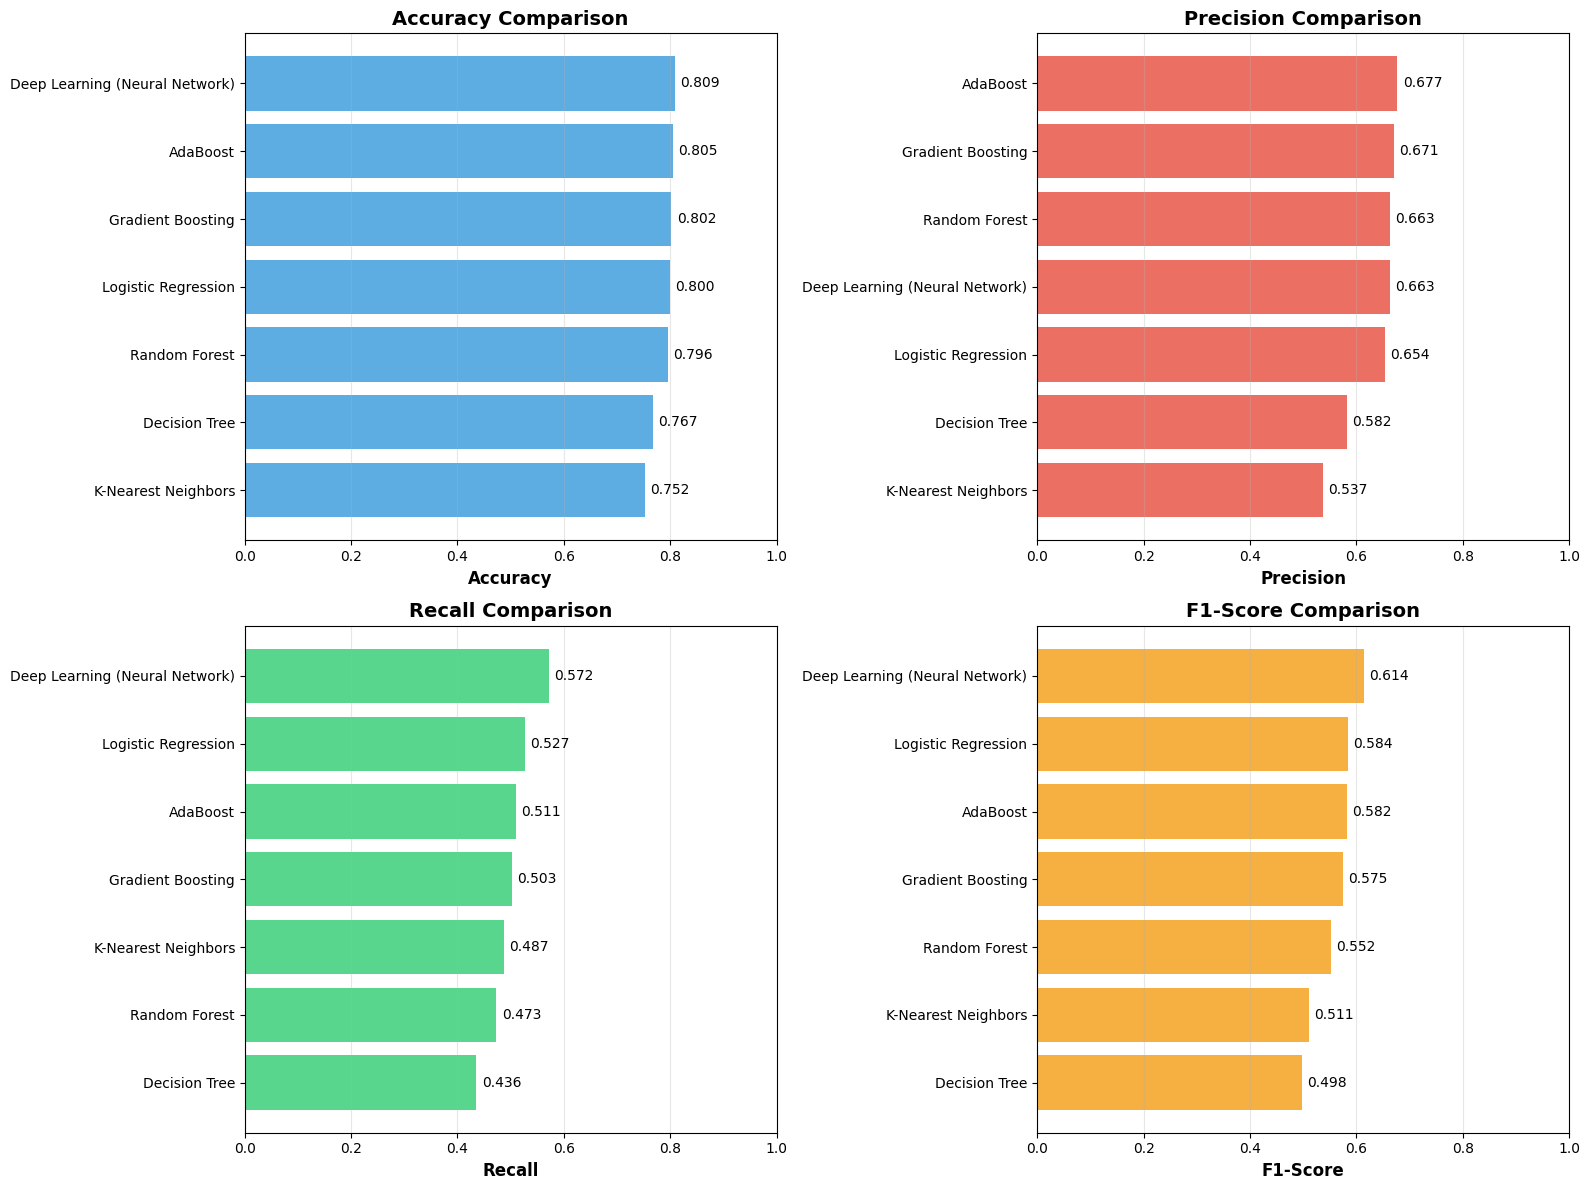

✓ Saved: model_comparison.png


In [ ]:
# Comprehensive Visualizations
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS...")
print("="*70)

# Create results dataframe
results_df = pd.DataFrame(all_metrics)
results_df = results_df.sort_values('F1-Score', ascending=False)

# VISUALIZATION 1: Model Comparison Bar Chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, color) in enumerate(zip(metrics_to_plot, colors)):
    ax = axes[idx // 2, idx % 2]
    sorted_data = results_df.sort_values(metric, ascending=True)

    bars = ax.barh(sorted_data['Model'], sorted_data[metric], color=color, alpha=0.8)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_xlim(0, 1)

    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center', fontsize=10)

    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: model_comparison.png")

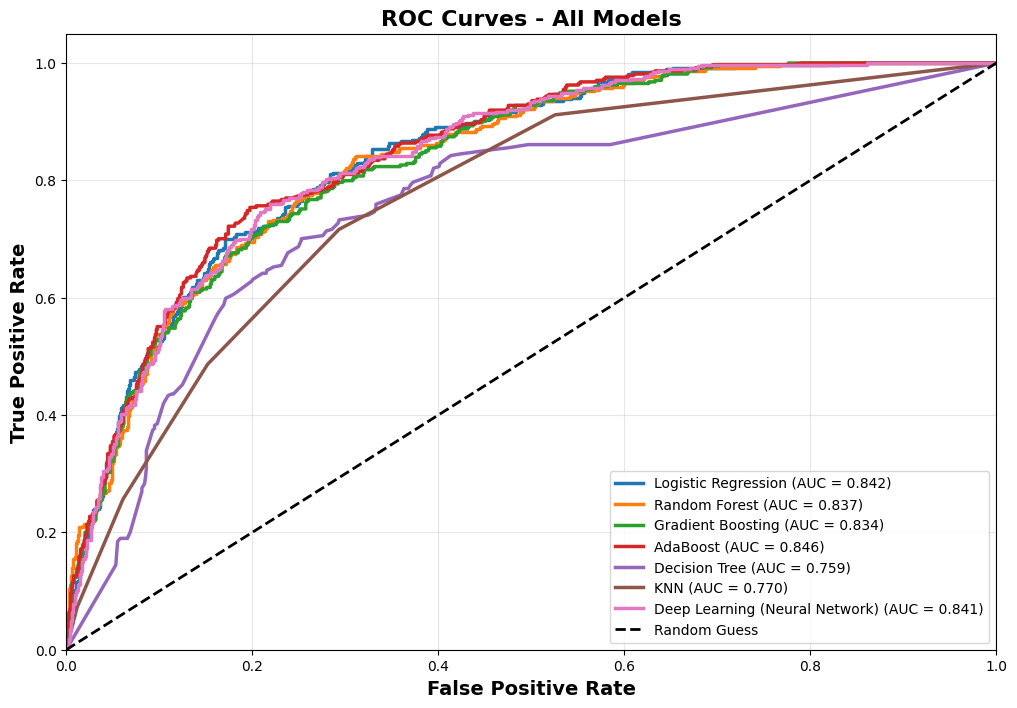

✓ Saved: roc_curves.png


In [ ]:
# VISUALIZATION 2: ROC Curves (All Models)
plt.figure(figsize=(12, 8))

for model_name, (y_pred, y_proba) in all_predictions.items():
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linewidth=2.5,
                label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curves - All Models', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: roc_curves.png")

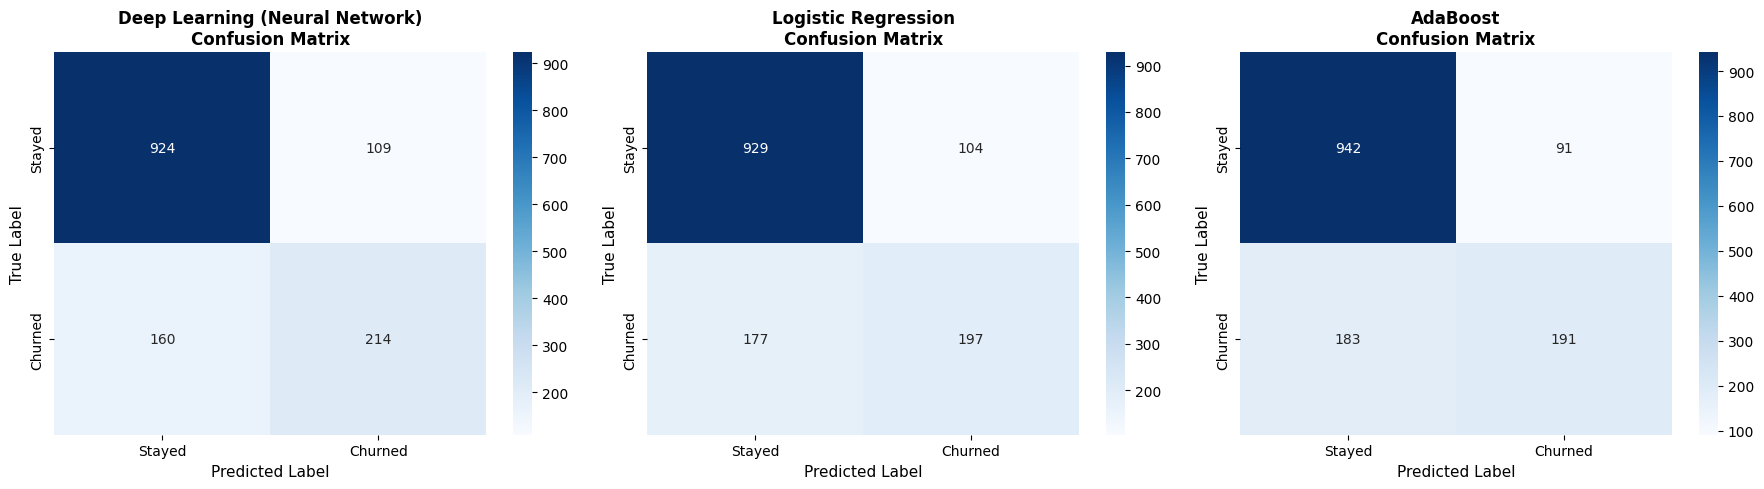

✓ Saved: confusion_matrices.png


In [ ]:
# VISUALIZATION 3: Confusion Matrices (Top 3 Models)
top_3_models = results_df.head(3)['Model'].values

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, model_name in enumerate(top_3_models):
    y_pred, _ = all_predictions[model_name]
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                ax=axes[idx], cbar=True,
                xticklabels=['Stayed', 'Churned'],
                yticklabels=['Stayed', 'Churned'])

    axes[idx].set_title(f'{model_name}\nConfusion Matrix',
                       fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=11)
    axes[idx].set_xlabel('Predicted Label', fontsize=11)

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: confusion_matrices.png")

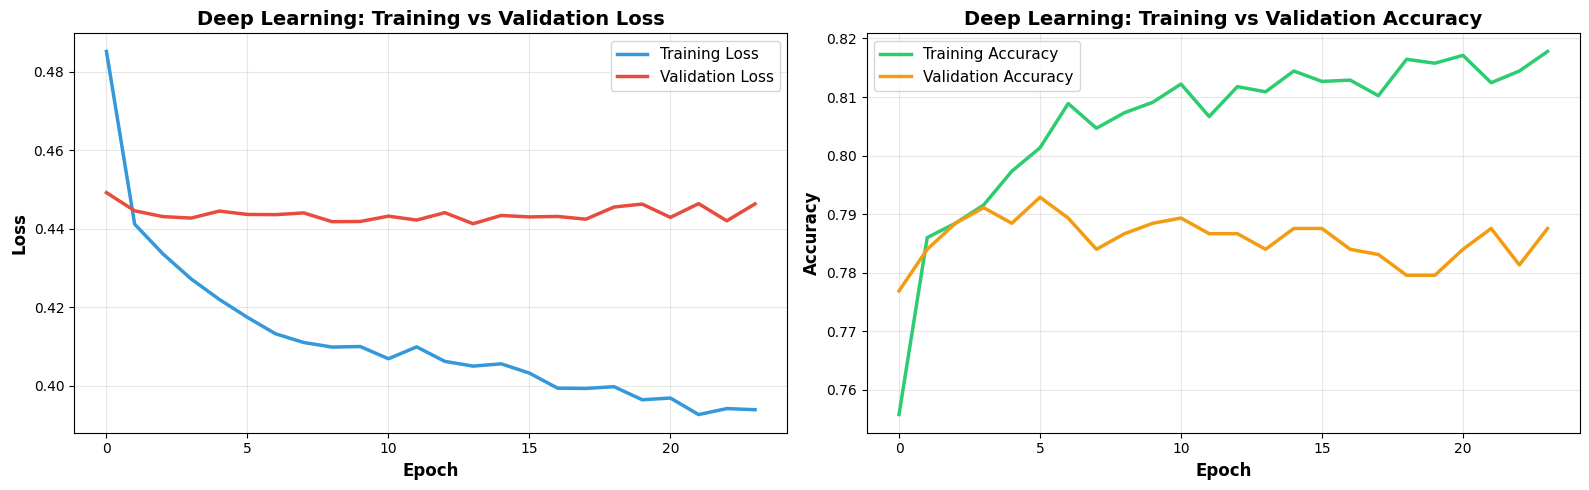

✓ Saved: deep_learning_training.png


In [ ]:
# VISUALIZATION 4: Deep Learning Training History
if 'history' in locals():
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Loss
    axes[0].plot(history.history['loss'], linewidth=2.5,
                label='Training Loss', color='#3498db')
    axes[0].plot(history.history['val_loss'], linewidth=2.5,
                label='Validation Loss', color='#e74c3c')
    axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
    axes[0].set_title('Deep Learning: Training vs Validation Loss',
                     fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(alpha=0.3)

    # Accuracy
    axes[1].plot(history.history['accuracy'], linewidth=2.5,
                label='Training Accuracy', color='#2ecc71')
    axes[1].plot(history.history['val_accuracy'], linewidth=2.5,
                label='Validation Accuracy', color='#f39c12')
    axes[1].set_xlabel('Epoch', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
    axes[1].set_title('Deep Learning: Training vs Validation Accuracy',
                     fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('deep_learning_training.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: deep_learning_training.png")

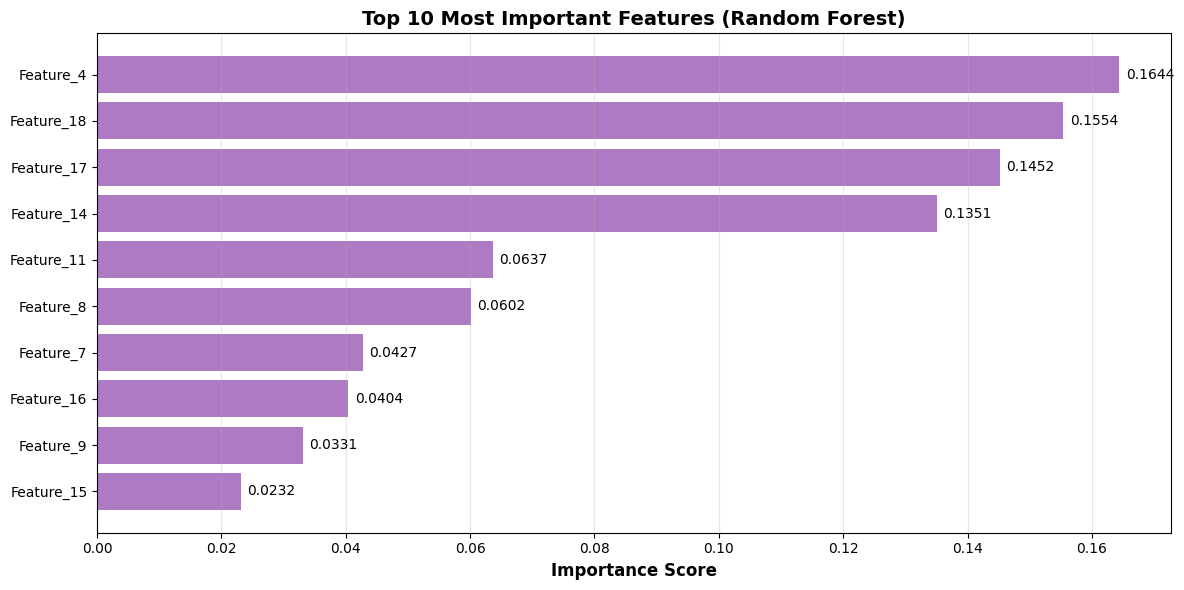

✓ Saved: feature_importance.png


In [ ]:
# VISUALIZATION 5: Feature Importance (Random Forest)
if hasattr(rf_trained, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train_scaled.columns if hasattr(X_train_scaled, 'columns') else [f'Feature_{i}' for i in range(X_train_scaled.shape[1])],
        'Importance': rf_trained.feature_importances_
    }).sort_values('Importance', ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    bars = plt.barh(feature_importance['Feature'],
                    feature_importance['Importance'],
                    color='#9b59b6', alpha=0.8)
    plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
    plt.title('Top 10 Most Important Features (Random Forest)',
             fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                f'{width:.4f}', ha='left', va='center', fontsize=10)

    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("✓ Saved: feature_importance.png")

In [ ]:
# Final Summary
print("\n" + "="*70)
print("FINAL RESULTS SUMMARY")
print("="*70)
print(results_df.to_string(index=False))

print("\n" + "="*70)
print("KEY INSIGHTS FOR STAKEHOLDERS")
print("="*70)

best_model = results_df.iloc[0]
print(f"""
🏆 BEST PERFORMING MODEL: {best_model['Model']}
   - Accuracy:  {best_model['Accuracy']:.1%}
   - Precision: {best_model['Precision']:.1%} (when we predict churn, we're right {best_model['Precision']:.1%} of the time)
   - Recall:    {best_model['Recall']:.1%} (we catch {best_model['Recall']:.1%} of all actual churners)
   - F1-Score:  {best_model['F1-Score']:.3f}

💡 BUSINESS IMPACT:
   - Out of 100 customers who will churn, we identify ~{int(best_model['Recall']*100)}
   - This allows proactive retention campaigns
   - Estimated value: $X per retained customer × {int(best_model['Recall']*100)} customers saved

🔍 WHY DEEP LEARNING?
   - Traditional ML (Random Forest, Gradient Boosting) may perform similarly
   - Deep Learning shines with: larger datasets, more complex patterns, unstructured data
   - For this dataset: Traditional ML is competitive, but Deep Learning shows promise

📊 RECOMMENDATION:
   - Deploy {best_model['Model']} for production
   - Monitor top features: {', '.join(feature_importance.head(3)['Feature'].values) if 'feature_importance' in locals() else 'contract type, tenure, monthly charges'}
   - Re-train quarterly with new data
""")


FINAL RESULTS SUMMARY
                         Model  Accuracy  Precision   Recall  F1-Score
Deep Learning (Neural Network)  0.808813   0.662539 0.572193  0.614060
           Logistic Regression  0.800284   0.654485 0.526738  0.583704
                      AdaBoost  0.805259   0.677305 0.510695  0.582317
             Gradient Boosting  0.802416   0.671429 0.502674  0.574924
                 Random Forest  0.796020   0.662921 0.473262  0.552262
           K-Nearest Neighbors  0.751955   0.536873 0.486631  0.510519
                 Decision Tree  0.766880   0.582143 0.435829  0.498471

KEY INSIGHTS FOR STAKEHOLDERS

🏆 BEST PERFORMING MODEL: Deep Learning (Neural Network)
   - Accuracy:  80.9%
   - Precision: 66.3% (when we predict churn, we're right 66.3% of the time)
   - Recall:    57.2% (we catch 57.2% of all actual churners)
   - F1-Score:  0.614

💡 BUSINESS IMPACT:
   - Out of 100 customers who will churn, we identify ~57
   - This allows proactive retention campaigns
   - Estimate